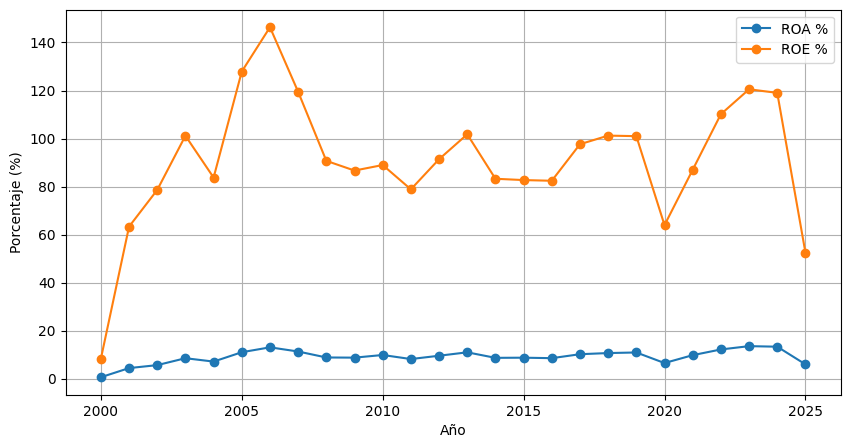

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#Load CSV
df = pd.read_csv("BankData.csv")

#Convert date
df["Month"] = pd.to_datetime(df["Month"], format = "%Y%M")
df["Year"] = df["Month"].dt.year

#Group Data
yearly = df.groupby("Year").agg({
    "Assets": "mean",
    "Equity": "mean",
    "Net Income": "sum"
}).reset_index()

#Calculate ROA and ROE (Yearly)
yearly["ROA"] = yearly["Net Income"] / yearly["Assets"]
yearly["ROE"] = yearly["Net Income"] / yearly["Equity"]

#Convert to %
yearly["ROA_pct"] = yearly["ROA"] * 100
yearly["ROE_pct"] = yearly["ROE"] * 100

plt.figure(figsize=(10,5))
plt.plot(yearly["Year"], yearly["ROA_pct"], marker = "o", label = "ROA %")
plt.plot(yearly["Year"], yearly["ROE_pct"], marker = "o", label = "ROE %")
plt.title("ROA y ROE del Sistema Bancario Mexicano del 2000 al 2025")
plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.legend()
plt.grid(True)
plt.show()